In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from utils import create_plotly_conf_mat
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper

Mapper._load_data_if_needed()

In [3]:
path = "../../data/fmri/fmri_audio_export.csv"
df = pd.read_csv(path)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply
0,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,0,A227_neu_sit2_p.mp4,1,neutral,A227,0,22,100,NaN,22
1,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,1,A65_int_p_2.mp4,1,interest_curiosity,A65,0,29,100,2.0,22
2,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,2,A205_ang_p_2.mp4,1,anger,A205,0,12,100,2.0,12
3,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,3,A55_pri_p_3.mp4,1,pride,A55,0,41,100,3.0,22
4,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,4,A75_pri_p_3.mp4,1,pride,A75,0,41,100,3.0,22


## General Results

In [4]:
y_true = df[["emotion_1_id"]]
y_pred = df[["reply"]]

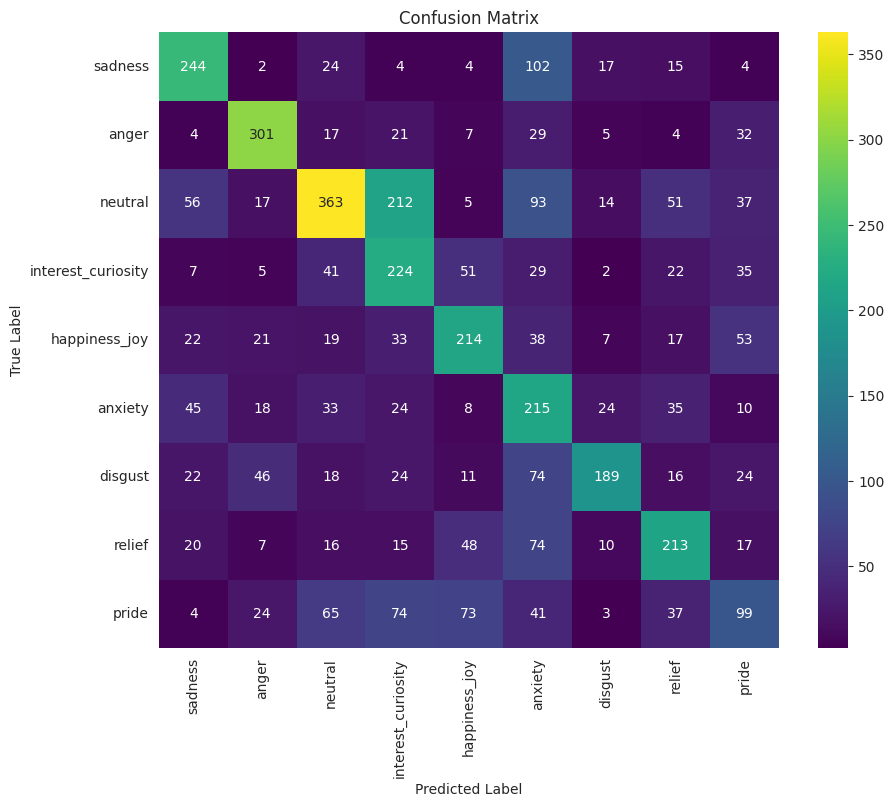

In [5]:
emotion_ids = np.unique(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)

emotions = Mapper.get_emotion_from_id(emotion_ids)

plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
emotion_ids = Mapper.get_emotion_from_id(np.unique(y_true))
report = classification_report(y_true, y_pred, target_names=emotion_ids)
print(report)

                    precision    recall  f1-score   support

           sadness       0.58      0.59      0.58       416
             anger       0.68      0.72      0.70       420
           neutral       0.61      0.43      0.50       848
interest_curiosity       0.35      0.54      0.43       416
     happiness_joy       0.51      0.50      0.51       424
           anxiety       0.31      0.52      0.39       412
           disgust       0.70      0.45      0.54       424
            relief       0.52      0.51      0.51       420
             pride       0.32      0.24      0.27       420

          accuracy                           0.49      4200
         macro avg       0.51      0.50      0.49      4200
      weighted avg       0.52      0.49      0.49      4200


In [7]:
df['accurate'] = df['emotion_1_id'] == df['reply']
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,accurate
0,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,0,A227_neu_sit2_p.mp4,1,neutral,A227,0,22,100,NaN,22,True
1,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,1,A65_int_p_2.mp4,1,interest_curiosity,A65,0,29,100,2.0,22,False
2,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,2,A205_ang_p_2.mp4,1,anger,A205,0,12,100,2.0,12,True
3,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,3,A55_pri_p_3.mp4,1,pride,A55,0,41,100,3.0,22,False
4,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,4,A75_pri_p_3.mp4,1,pride,A75,0,41,100,3.0,22,False


## Accuracy by subject

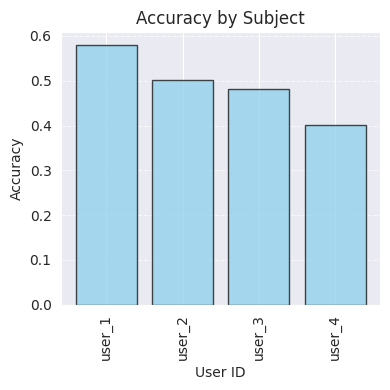

In [8]:
# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_subject = df.groupby('user_id')['accurate'].mean().reset_index()

plt.figure(figsize=(4, 4))
plt.bar(accuracy_by_subject['user_id'], accuracy_by_subject['accurate'], color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Accuracy")
plt.title("Accuracy by Subject")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines only
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

## Accuracy By Emotion

In [9]:
# Map emotion IDs to actual emotions using your Mapper class and create a new 'emotion' column
df['emotion'] = df['emotion_1_id'].map(Mapper.get_emotion_from_id)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,accurate,emotion
0,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,0,A227_neu_sit2_p.mp4,1,neutral,A227,0,22,100,NaN,22,True,neutral
1,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,1,A65_int_p_2.mp4,1,interest_curiosity,A65,0,29,100,2.0,22,False,interest_curiosity
2,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,2,A205_ang_p_2.mp4,1,anger,A205,0,12,100,2.0,12,True,anger
3,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,3,A55_pri_p_3.mp4,1,pride,A55,0,41,100,3.0,22,False,pride
4,user_2,1054c2911645267eb7cf2b57a9707cb66f759761e14eaa...,4,A75_pri_p_3.mp4,1,pride,A75,0,41,100,3.0,22,False,pride


In [10]:
# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_emotion = df.groupby('emotion')['accurate'].mean().reset_index()

# Rename the columns for clarity
accuracy_by_emotion.columns = ['emotion', 'accuracy']

# Print or plot the accuracy results
print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))

              emotion  accuracy
0               anger  0.716667
8             sadness  0.586538
4  interest_curiosity  0.538462
1             anxiety  0.521845
7              relief  0.507143
3       happiness_joy  0.504717
2             disgust  0.445755
5             neutral  0.428066
6               pride  0.235714


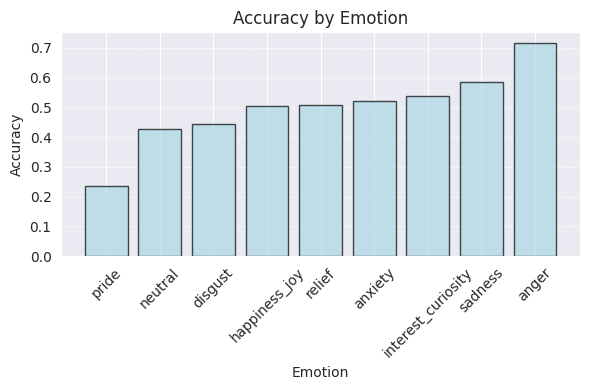

In [11]:
# Sort the DataFrame by 'accuracy' to have a meaningful order in the plot
accuracy_by_emotion_sorted = accuracy_by_emotion.sort_values(by='accuracy', ascending=True)

plt.figure(figsize=(6, 4))

# Create a vertical bar plot
plt.bar(accuracy_by_emotion_sorted['emotion'], accuracy_by_emotion_sorted['accuracy'], color='lightblue', edgecolor='k', alpha=0.7)

plt.xlabel("Emotion")
plt.ylabel("Accuracy")
plt.title("Accuracy by Emotion")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines only

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

## Accuracy by item

In [12]:
# Assuming 'df' is your DataFrame
accuracy_by_filename = df.groupby('filename')['accurate'].mean().reset_index()
accuracy_by_filename

,filename,accurate
0,A101_ang_p_2.mp4,0.25
1,A101_ang_p_3.mp4,0.50
2,A101_anx_p_2.mp4,0.50
3,A101_anx_p_3.mp4,0.75
4,A101_disg_p_2.mp4,0.00
...,...,...
1045,A91_pri_p_3.mp4,0.25
1046,A91_rel_p_2.mp4,0.25
1047,A91_rel_p_3.mp4,0.00
1048,A91_sad_p_2.mp4,0.00


In [13]:
accuracy_by_filename["accurate"].value_counts().sort_index()

accurate
0.00    215
0.25    228
0.50    191
0.75    212
1.00    204
Name: count, dtype: int64

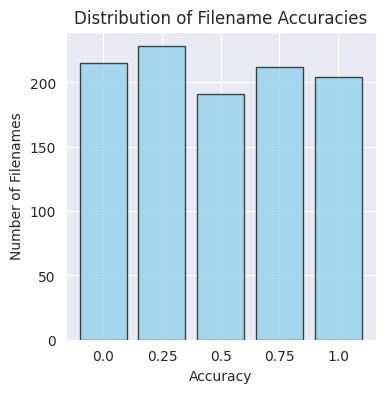

In [14]:
accuracy_counts = accuracy_by_filename['accurate'].value_counts().sort_index()


plt.figure(figsize=(4, 4))
plt.bar(accuracy_counts.index.astype(str), accuracy_counts.values, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Number of Filenames')
plt.title('Distribution of Filename Accuracies')
plt.xticks(accuracy_counts.index.astype(str))  # Ensure all accuracy categories are shown as x-ticks
plt.show()

In [15]:
accuracy_by_filename.rename(columns={'accurate': 'accuracy'}, inplace=True)

In [16]:
accuracy_by_filename.to_csv('../../data/fmri/audio_accuracy_by_filename.csv', index=False)